# Random Forest Classifier 

References:

- [Random Forest Classifier](https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/)


Los modelos de ensamble combinan múltiples modelos de Machine Learning para mejorar la precisión y robustez de las predicciones. En lugar de confiar en un solo modelo, usan el poder de varios para reducir el overfitting, mejorar la generalización y minimizar errores.

Implementing Random Forest Classification in Python
Before implementing random forest classifier in Python let’s first understand it’s parameters.

n_estimators: Number of trees in the forest.
max_depth: Maximum depth of each tree.
max_features: Number of features considered for splitting at each node.
criterion: Function used to measure split quality (‘gini’ or ‘entropy’).
min_samples_split: Minimum samples required to split a node.
min_samples_leaf: Minimum samples required to be at a leaf node.
bootstrap: Whether to use bootstrap sampling when building trees (True or False).

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

In [8]:
# Import Dataset

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
# Data Preparation
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [10]:
# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# 5. Feature Scaling
# Feature scaling ensures that all the features are on a similar scale which is important for some machine learning models. 
# However Random Forest is not highly sensitive to feature scaling. But it is a good practice to scale when combining models.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# 6. Building Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Accuracy: 100.00%


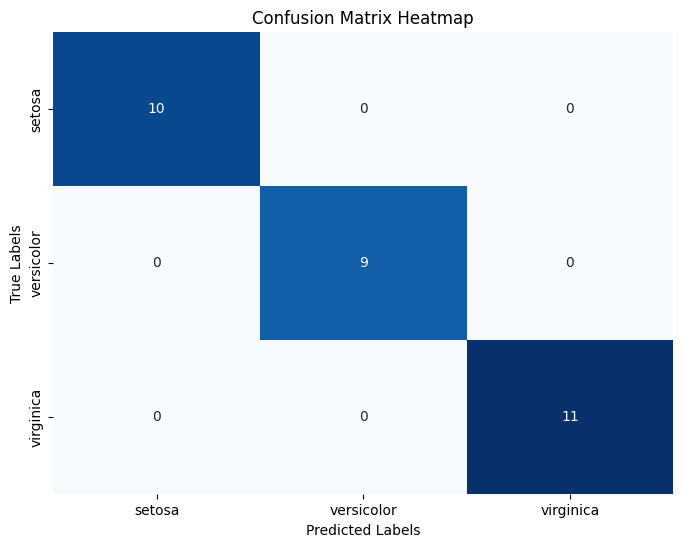

In [13]:
# 7.  Evaluation of the Model

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=iris.target_names, yticklabels=iris.target_names)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# 8. Feature Importance

feature_importances = classifier.feature_importances_

plt.barh(iris.feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

From the graph we can see that petal width (cm) is the most important feature followed closely by petal length (cm). The sepal width (cm) and sepal length (cm) have lower importance in determining the model’s predictions. This indicates that the classifier relies more on the petal measurements to make predictions about the flower species.

Random Forest Classifiers are useful for classification tasks offering high accuracy and robustness. They are easy to use, provide insights into feature importance and can handle complex datasets.